In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [8]:
dataframe = pd.read_csv('Bank Customer Churn Prediction.csv')

In [9]:
dataframe.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
dataframe.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [11]:
dataframe.shape

(10000, 12)

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [13]:
dataframe.select_dtypes(include= 'object').head()

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [14]:
dataframe.describe(include = 'object')

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [15]:
dataframe.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [16]:
dataframe.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
dataframe.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [19]:
dataframe["age"].value_counts()

age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

<Axes: title={'center': 'Distribution'}, xlabel='age'>

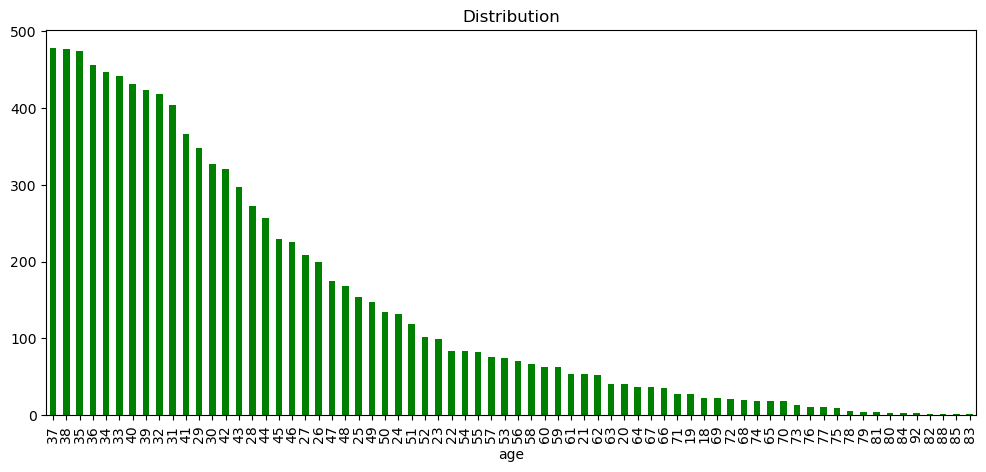

In [20]:
dataframe['age'].value_counts().plot(kind = 'bar', 
                                 figsize = (12, 5), 
                                 title = 'Distribution', 
                                 cmap = 'ocean')

In [22]:
dataframe["gender"].value_counts(normalize = True)

gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution'}, xlabel='gender'>

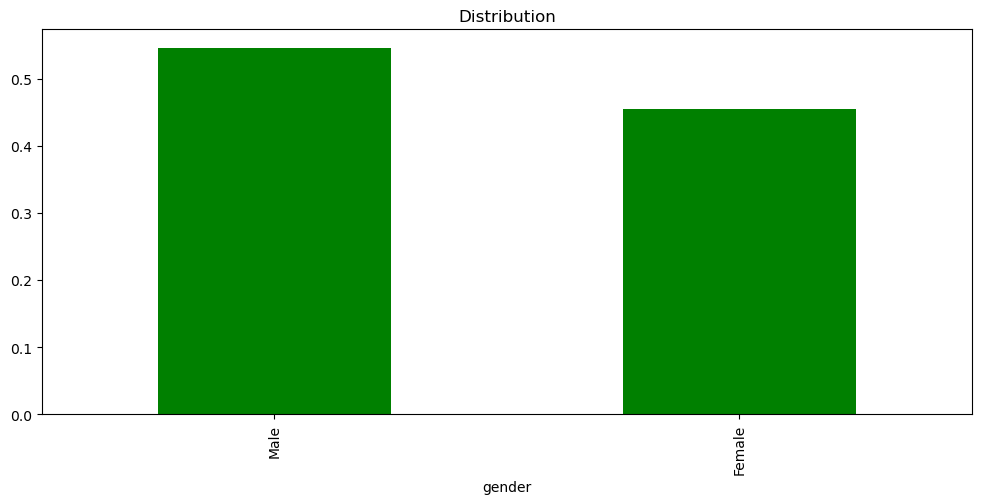

In [23]:
dataframe['gender'].value_counts(normalize = True).plot(kind = 'bar', 
                                                         figsize = (12, 5), 
                                                         title = 'Distribution', 
                                                         cmap = 'ocean')

In [24]:
dataframe.sort_values(by = "tenure", ascending = False).head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7565,15623369,708,France,Male,52,10,105355.81,1,1,0,123.07,1
9302,15752534,744,France,Male,36,10,0.00,2,1,1,182867.84,0
376,15583456,745,Germany,Male,45,10,117231.63,3,1,1,122381.02,1
7596,15794868,599,Germany,Male,40,10,137456.28,2,1,1,14113.11,0
6827,15760216,718,France,Female,49,10,0.00,1,1,0,184474.72,1


In [25]:
dataframe.sort_values(by = ["age", "tenure"], ascending = [True, False]).head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1619,15770309,656,France,Male,18,10,151762.74,1,0,1,127014.32,0
4716,15805764,646,France,Male,18,10,0.00,2,0,1,52795.15,0
7722,15570086,684,Germany,Male,18,9,90544.00,1,0,1,4777.23,0
8522,15619892,644,Spain,Male,18,8,0.00,2,1,0,59172.42,0
9932,15813451,677,Spain,Male,18,8,134796.87,2,1,1,114858.90,0


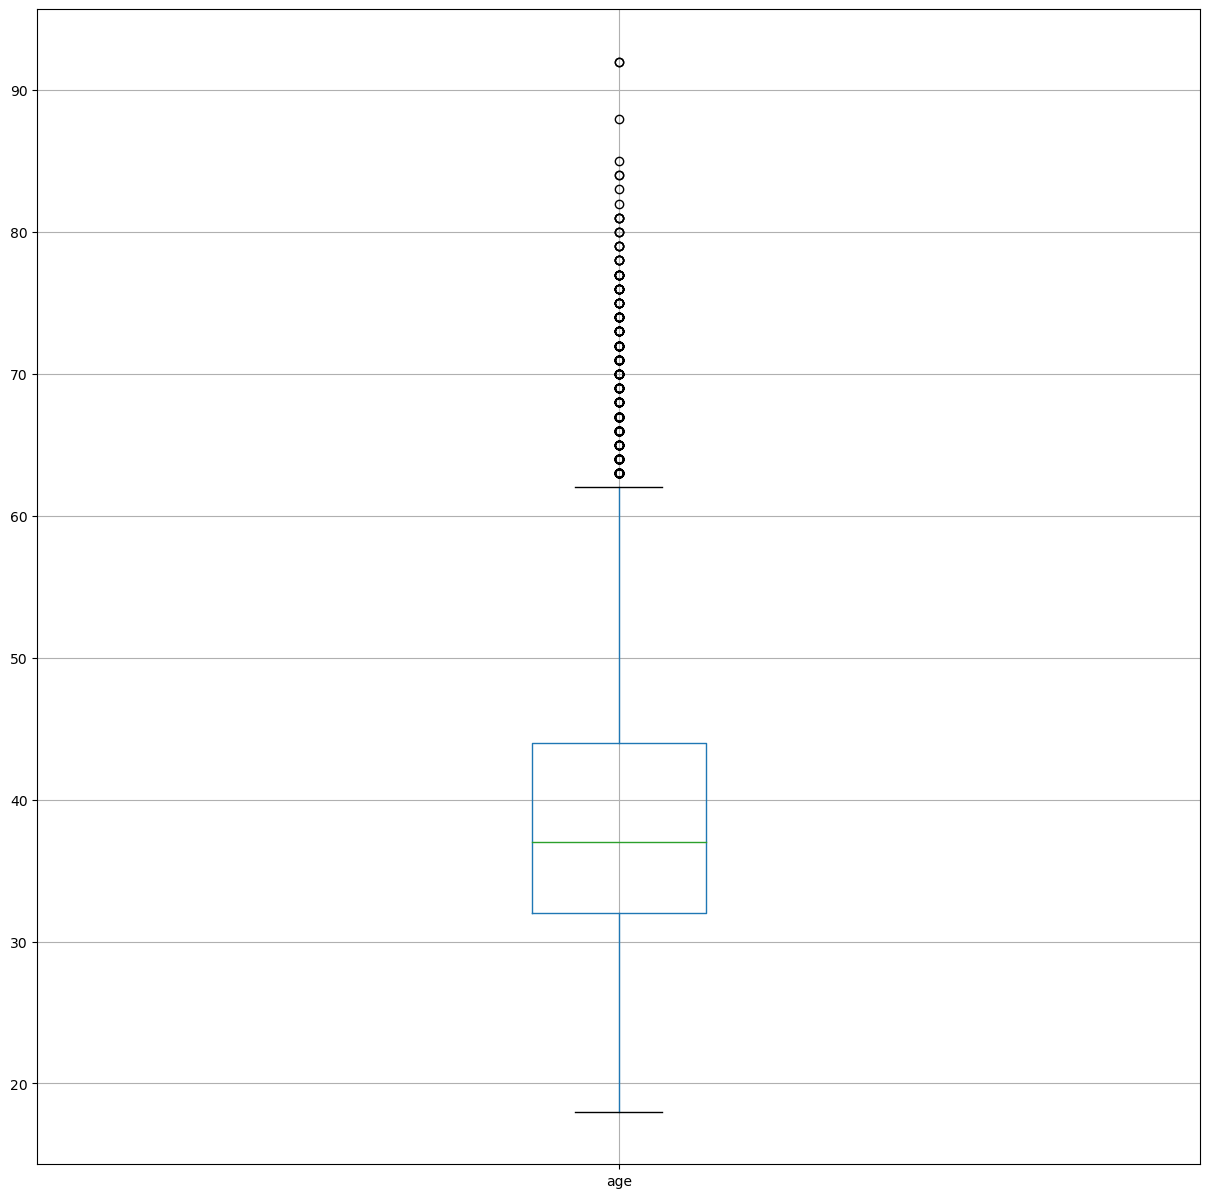

In [34]:
dataframe.boxplot(column = "age",
  figsize = (15, 15))
plt.show()

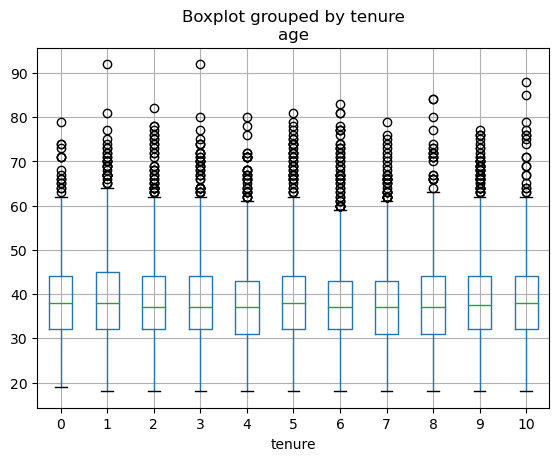

In [35]:
dataframe.boxplot(column = "age",
           by = "tenure")
plt.show()

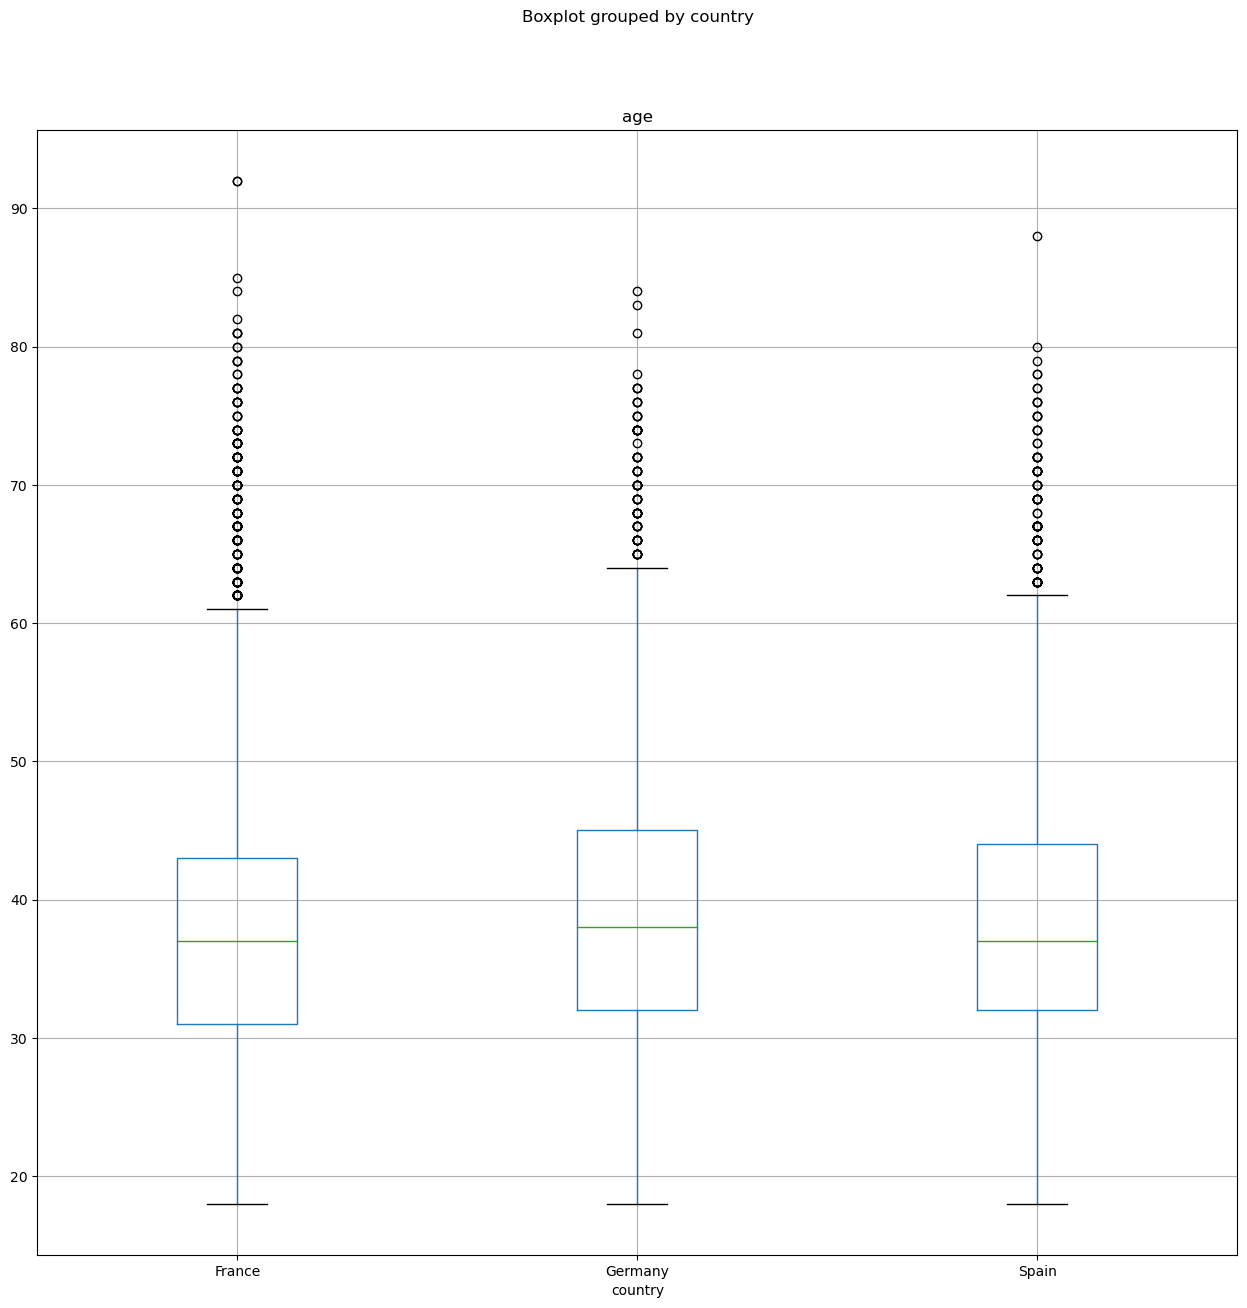

In [38]:
dataframe.boxplot(column = "age",
  by = "country",
  figsize = (15, 15))
plt.show()